# **Data Analyst Intern Assignment: Analyse User Engagement on an Online Learning Platform**  



##### **Assignment Task**
##### **Name**    - Sandip Salunkhe


# **Summary -**

Zylentrix runs an online training platform where students enrol in different
learning tracks (e.g., Digital Marketing, Python, UI/UX, etc.). The platform
records student behaviour, such as logins, course completions, time spent
on lessons, and feedback.

# **Problem Statement**


Analyse User Engagement on an Online Learning Platform

#### **Define Your Business Objective?**

To enhance user engagement and satisfaction by understanding student behavior patterns, optimizing course content, and improving the overall learning experience. This involves identifying high-performing courses, pinpointing areas needing improvement, and tailoring marketing strategies to increase enrollment and retention rates. By leveraging data insights, Zylentrix aims to boost learner outcomes and drive platform growth.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data-Set Visulization lib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.image as mpimg
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
course_activity = pd.read_csv("course_activity.csv")
feedback = pd.read_csv("feedback.csv")
students = pd.read_csv("students.csv")
merged_df = course_activity.merge(feedback, on='Student_ID').merge(students, on='Student_ID')

### Dataset First View

In [ ]:
# Dataset First Look
merged_df

,Student_ID,Course_ID_x,Date,Time_Spent_Minutes,Completion_Percentage,Course_ID_y,Rating,Feedback_Text,Name,Age,Gender,Location,Enrolment_Date
0,S002,PY202,03/02/2024,45,32.20,PY202,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
1,S002,UX303,15/03/2024,119,90.80,PY202,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
2,S002,WD404,16/02/2024,66,99.76,PY202,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
3,S002,PY202,06/03/2024,136,18.18,PY202,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
4,S002,DM101,15/01/2024,49,66.47,PY202,3,Well structured,Student_2,32,Other,Chennai,27/02/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,S100,PY202,03/03/2024,83,22.63,DM101,4,Too fast-paced,Student_100,22,Other,Bangalore,16/06/2023
522,S100,UX303,27/02/2024,168,14.83,DM101,4,Too fast-paced,Student_100,22,Other,Bangalore,16/06/2023
523,S100,UX303,02/01/2024,134,22.29,DM101,4,Too fast-paced,Student_100,22,Other,Bangalore,16/06/2023
524,S100,WD404,12/03/2024,139,68.78,DM101,4,Too fast-paced,Student_100,22,Other,Bangalore,16/06/2023


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of Columns: {merged_df.shape[1]}")
print(f"Number of Rows: {merged_df.shape[0]}")

Number of Columns: 13
Number of Rows: 526


### Dataset Information

In [ ]:
# Dataset Info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             526 non-null    object 
 1   Course_ID_x            526 non-null    object 
 2   Date                   526 non-null    object 
 3   Time_Spent_Minutes     526 non-null    int64  
 4   Completion_Percentage  526 non-null    float64
 5   Course_ID_y            526 non-null    object 
 6   Rating                 526 non-null    int64  
 7   Feedback_Text          526 non-null    object 
 8   Name                   526 non-null    object 
 9   Age                    526 non-null    int64  
 10  Gender                 526 non-null    object 
 11  Location               526 non-null    object 
 12  Enrolment_Date         526 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 53.6+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(merged_df.duplicated().sum())

0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
merged_df.isnull().sum()

,0
Student_ID,0
Course_ID_x,0
Date,0
Time_Spent_Minutes,0
Completion_Percentage,0
Course_ID_y,0
Rating,0
Feedback_Text,0
Name,0
Age,0


In [ ]:
# Visualizing the missing values
def apply_chart_styling(ax, fig, title, subtitle, insight_text, logo_path='Zylentrix.jpg'):
    # Set background color for the whole figure and the chart area
    fig.patch.set_facecolor('#D3D3D3')
    ax.set_facecolor('#D3D3D3')

    # Add main title and subtitle to the chart
    fig.text(0.09, 1.05, title, fontsize=20, fontweight='bold', fontfamily='serif')
    fig.text(0.09, 0.99, subtitle, fontsize=16, fontweight='bold', fontfamily='serif')

    # Add "Insight" heading and the actual insight text on the side
    fig.text(1.1, 1.05, 'Insights:', fontsize=18, fontweight='bold', fontfamily='serif')
    fig.text(1.1, 0.50, insight_text, fontsize=16, fontweight='bold', fontfamily='serif')

    # Add a logo image to the figure
    logo = mpimg.imread(logo_path)
    logo_ax = fig.add_axes([1.5, 0.85, 0.1, 0.1])  # Position and size of the logo
    logo_ax.imshow(logo)
    logo_ax.axis('off')  # Hide axes for the logo

    # Add horizontal gridlines to the chart
    ax.grid(axis='y', linestyle='-', alpha=0.4)
    ax.set_axisbelow(True)  # Ensure grid lines are behind the data

    # Hide top, right, and left borders of the chart
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    # Set font size for tick labels on both axes
    ax.tick_params(axis='both', which='major', labelsize=12)

    # Draw a vertical dividing line on the figure
    a1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=2.0)
    fig.lines.extend([a1])

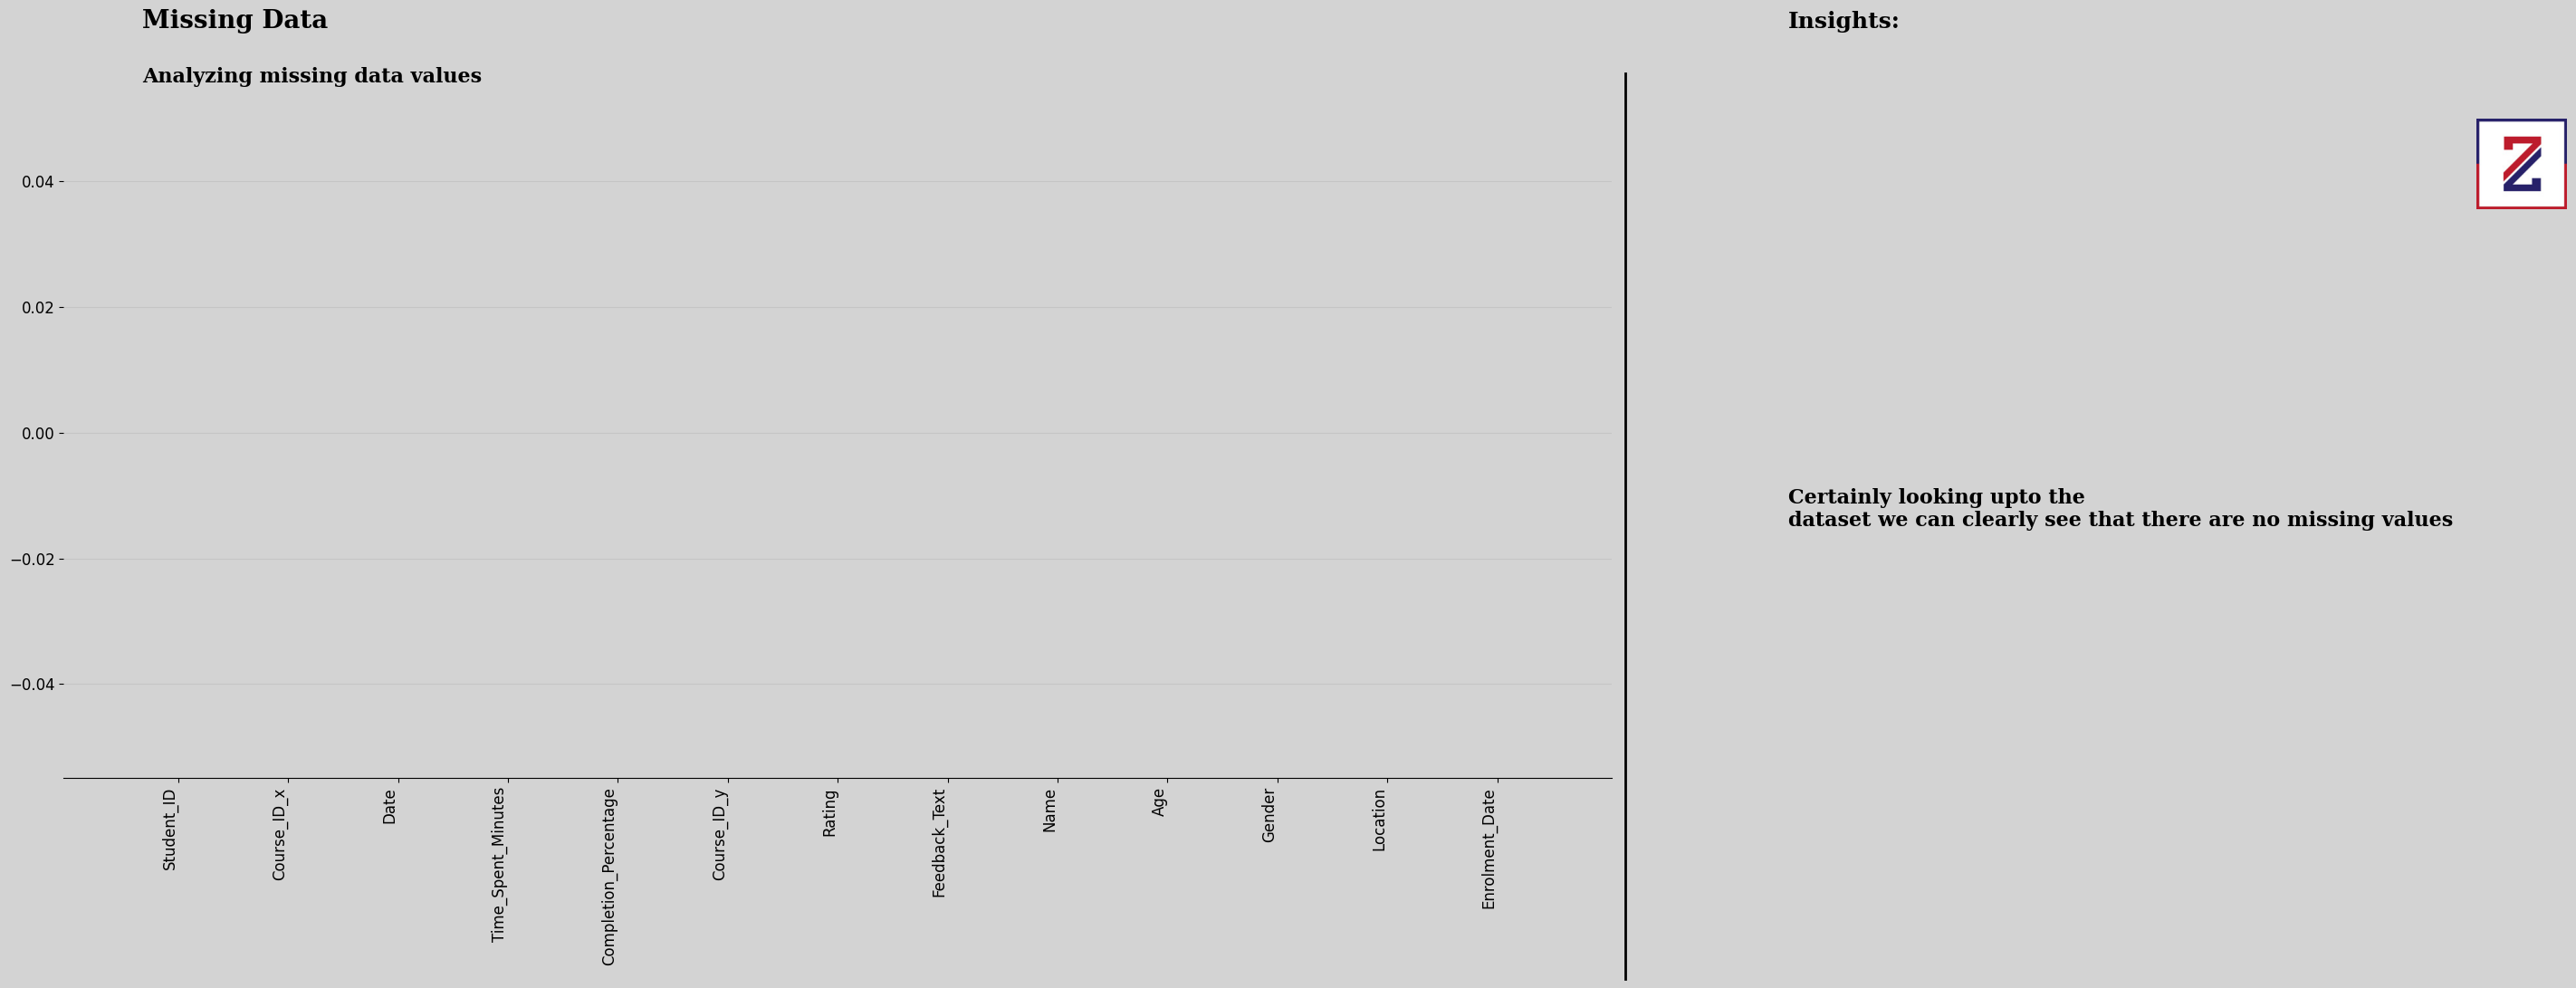

In [ ]:
# Calculate the number of missing values for each column, sort them in descending order
missing_data = merged_df.isnull().sum().sort_values(ascending = False)

# Create a figure and axis object for plotting, with a specified figure size
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Create a bar plot showing missing values per column
bars = ax.bar(missing_data.index, missing_data.values, color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Apply custom styling to the chart (title, subtitle, and insight text)
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Missing Data',
    subtitle='Analyzing missing data values',
    insight_text='''Certainly looking upto the
dataset we can clearly see that there are no missing values'''
)

# Adjust the layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()

### What did you know about your dataset?

Column Name      	Description
* Student_ID:  	      Unique student identifier.
* Course_ID:          Unique course identifier.
* Date: 	            Course activity date.
* Time_Spent_Minutes:	Time spent by student on the course (in minutes).
* Completion_Percentage:Percentage of course completed.
* Name:               	Student's name.
* Age:                	Student's age.
* Gender:             	Student's gender.
* Location:           	Student's location.
* Enrolment_Date:     	The date the student enrolled in the course.
* Rating:             	Feedback rating given by the student (if submitted).
* Feedback_Text:      	Text feedback given by the student.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
merged_df.columns

Index(['Student_ID', 'Course_ID_x', 'Date', 'Time_Spent_Minutes',
       'Completion_Percentage', 'Course_ID_y', 'Rating', 'Feedback_Text',
       'Name', 'Age', 'Gender', 'Location', 'Enrolment_Date'],
      dtype='object')

In [ ]:
# Dataset Describe
merged_df.describe()

,Time_Spent_Minutes,Completion_Percentage,Rating,Age
count,526.000000,526.000000,526.000000,526.000000
mean,99.114068,54.506578,2.954373,25.642586
std,48.434328,26.220072,1.454651,4.895247
min,10.000000,10.150000,1.000000,18.000000
25%,61.250000,31.572500,2.000000,21.000000
50%,101.500000,52.545000,3.000000,25.000000
75%,139.000000,77.065000,4.000000,30.000000
max,180.000000,100.000000,5.000000,34.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in merged_df.columns:
  print(f"{column} {len(merged_df[column].unique())}")

Student_ID 80
Course_ID_x 4
Date 91
Time_Spent_Minutes 161
Completion_Percentage 506
Course_ID_y 4
Rating 5
Feedback_Text 8
Name 80
Age 17
Gender 3
Location 5
Enrolment_Date 70


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Drop Duplicates
merged_df = merged_df.drop_duplicates()

# Convert date columns to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y', errors='coerce')
merged_df['Enrolment_Date'] = pd.to_datetime(merged_df['Enrolment_Date'], format='%d/%m/%Y', errors='coerce')

# Ensure numeric fields are the correct types
merged_df['Age'] = pd.to_numeric(merged_df['Age'], errors='coerce')
merged_df['Time_Spent_Minutes'] = pd.to_numeric(merged_df['Time_Spent_Minutes'], errors='coerce')
merged_df['Completion_Percentage'] = pd.to_numeric(merged_df['Completion_Percentage'], errors='coerce')
merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')

# Confirm the data types
merged_df.dtypes

,0
Student_ID,object
Course_ID_x,object
Date,datetime64[ns]
Time_Spent_Minutes,int64
Completion_Percentage,float64
Course_ID_y,object
Rating,int64
Feedback_Text,object
Name,object
Age,int64


### What all manipulations have you done and insights you found?

# Data Manipulations:
* Removed Duplicates: Ensured no repeated rows in the dataset.

* Converted Date Columns: Changed Date and Enrolment_Date to proper date format for easy time-based analysis.

* Ensured Numeric Data Types: Converted fields like Age, Time_Spent_Minutes, Completion_Percentage, and Rating to the correct numeric types for accurate calculations.

# Key Insights:
* Data is Clean: Dates and numbers are in the right format, ready for analysis.

* Missing Data: Some invalid or incorrectly formatted entries turned into NaN (missing values).

* Time-Based Analysis Possible: You can now analyze trends over time, like course performance and engagement.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
#### 1. What is the overall average completion rate across courses?

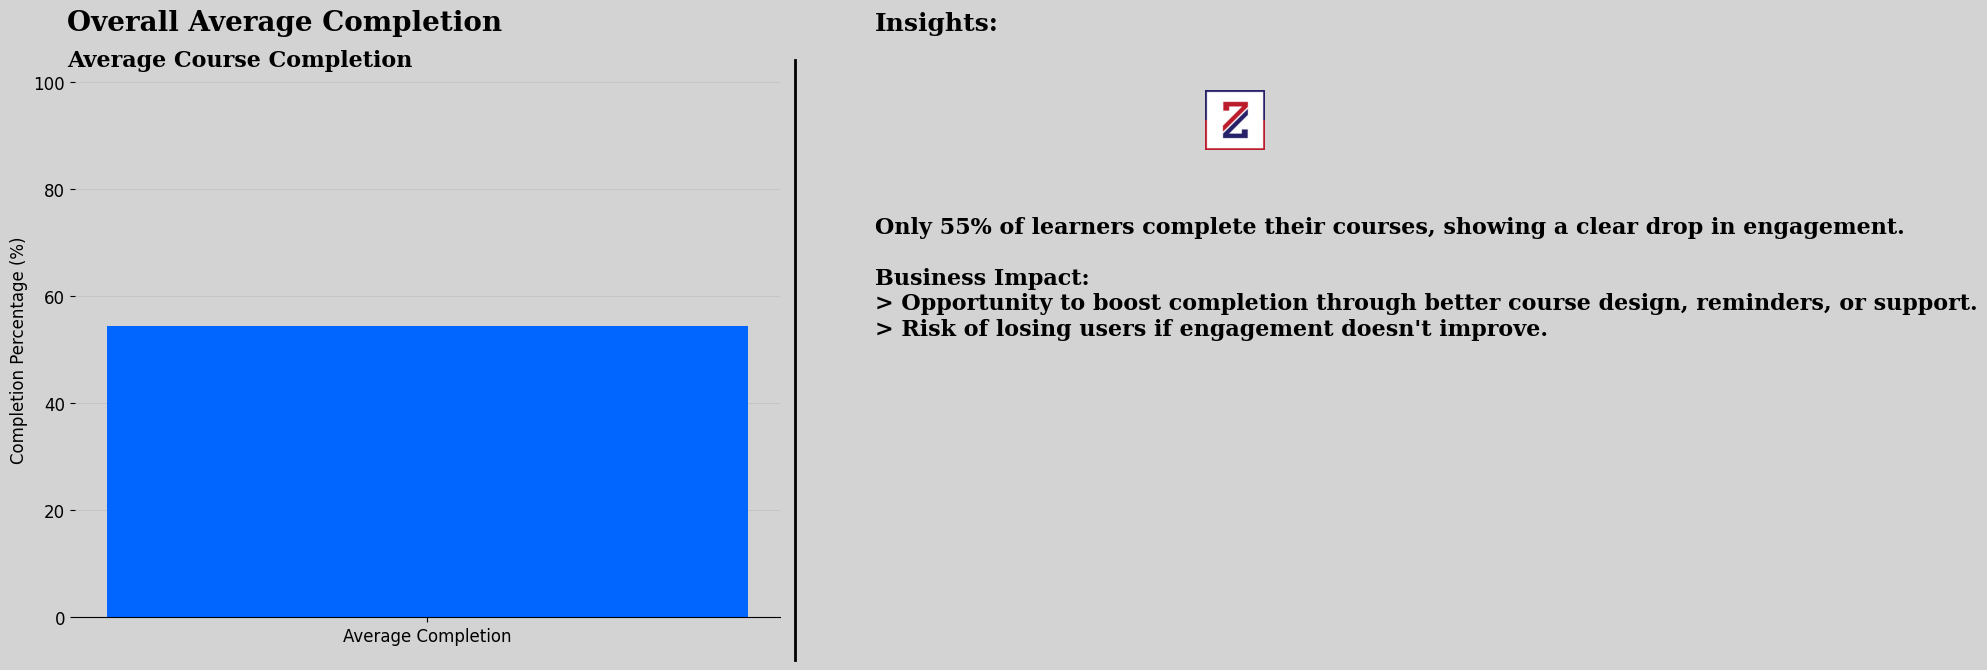

In [ ]:
# Calculate average completion from merged_df
average_completion = merged_df['Completion_Percentage'].mean()

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a simple bar plot
ax.bar(
    x=['Average Completion'],
    height=[average_completion],
    color='#0066ff'
)

# Y-axis formatting
ax.set_ylim(0, 100)
ax.set_ylabel('Completion Percentage (%)', fontsize=12)
ax.set_xlabel('')

# Apply custom styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Overall Average Completion',
    subtitle='Average Course Completion',
    insight_text=f'''Only {average_completion:.0f}% of learners complete their courses, showing a clear drop in engagement.
Business Impact:
> Opportunity to boost completion through better course design, reminders, or support.
> Risk of losing users if engagement doesn't improve.
''')

plt.tight_layout()
plt.show()

#### Chart - 2
#### Which course has the highest and lowest average engagement time?

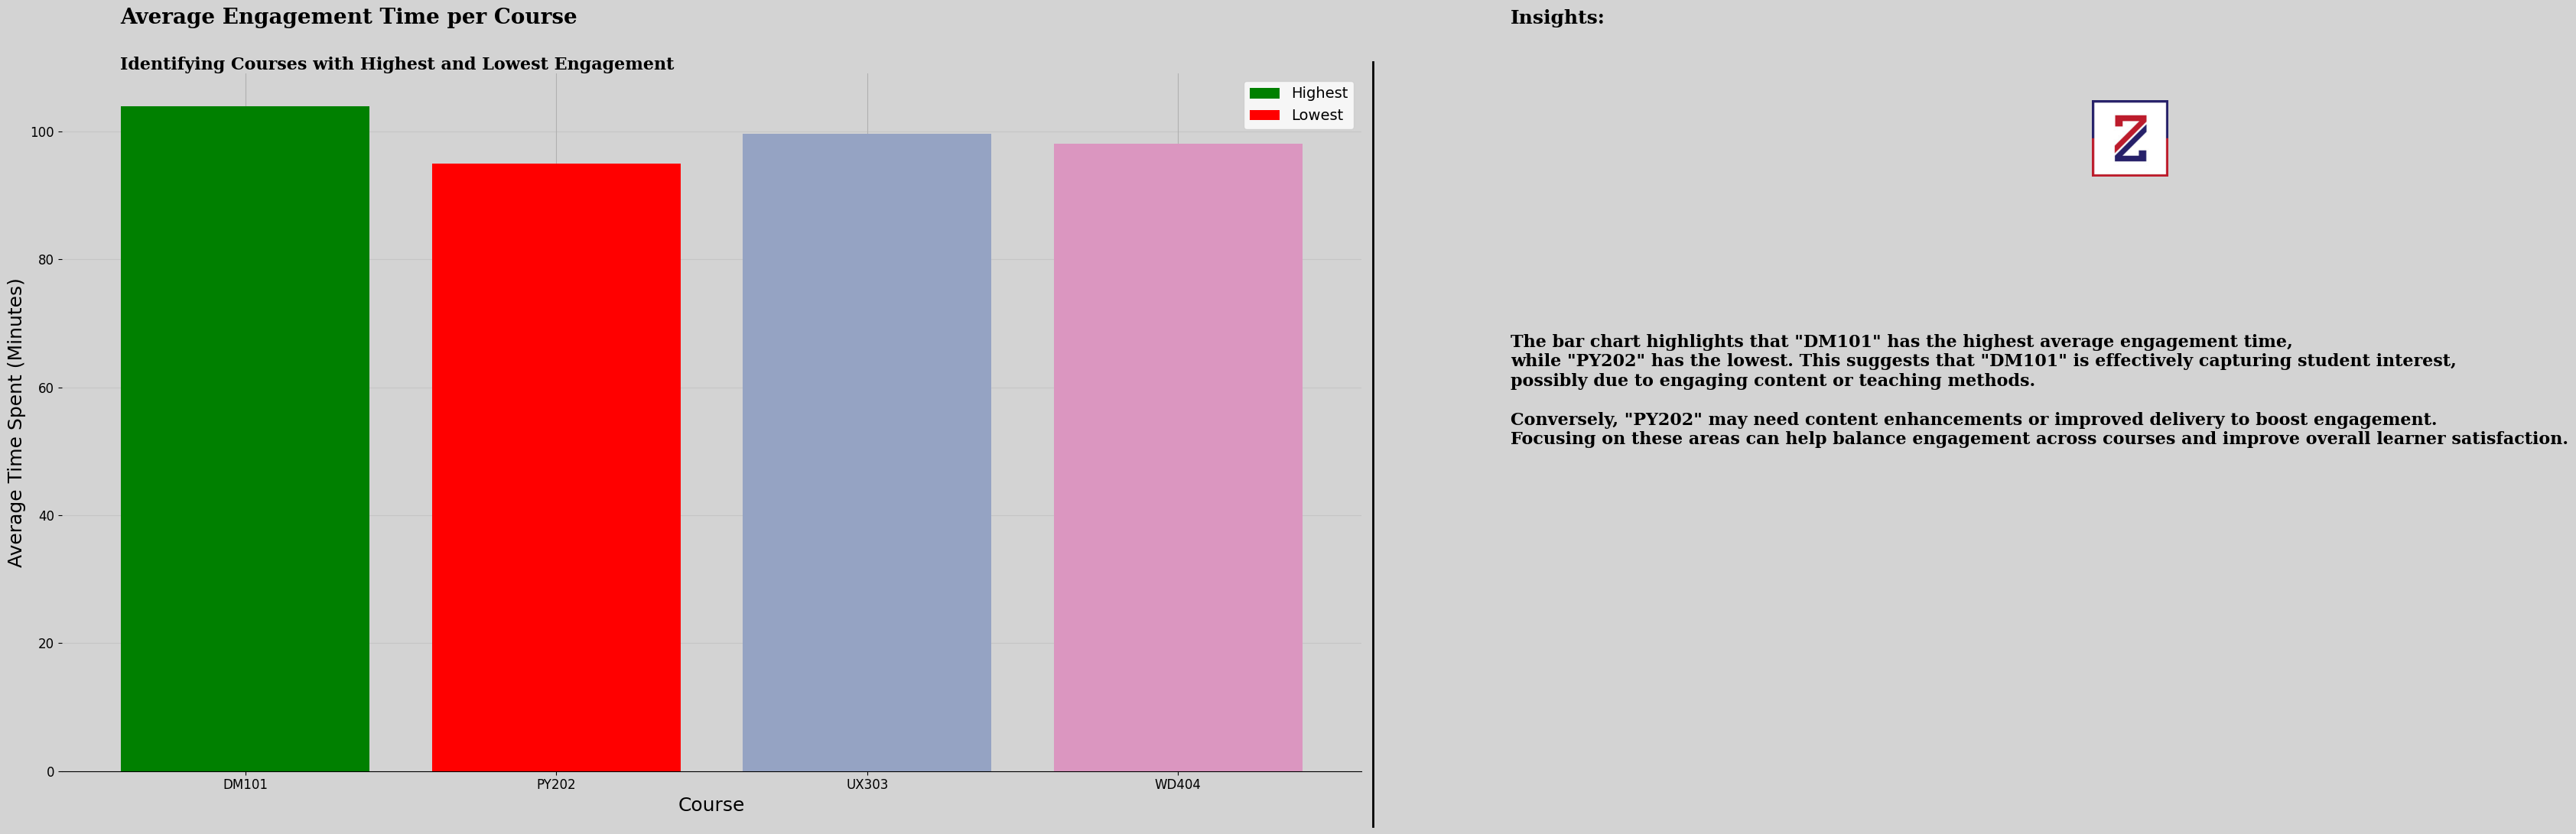

In [ ]:
# Calculate the average time spent for each course
average_time_per_course = merged_df.groupby('Course_ID_x')['Time_Spent_Minutes'].mean().reset_index()

# Create a bar plot
fig, ax = plt.subplots(1,1,figsize=(18, 10))
sns.barplot(data=average_time_per_course, x='Course_ID_x', y='Time_Spent_Minutes', palette='Set2')

highest_course = average_time_per_course.loc[average_time_per_course['Time_Spent_Minutes'].idxmax()]
lowest_course = average_time_per_course.loc[average_time_per_course['Time_Spent_Minutes'].idxmin()]

plt.bar(highest_course['Course_ID_x'], highest_course['Time_Spent_Minutes'], color='green', label='Highest')
plt.bar(lowest_course['Course_ID_x'], lowest_course['Time_Spent_Minutes'], color='red', label='Lowest')

ax.set_xlabel("Course", fontsize=18)
ax.set_ylabel("Average Time Spent (Minutes)", fontsize=18)
ax.legend(fontsize=14)
ax.grid()

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Average Engagement Time per Course',
    subtitle='Identifying Courses with Highest and Lowest Engagement',
    insight_text='''
The bar chart highlights that "DM101" has the highest average engagement time,
while "PY202" has the lowest. This suggests that "DM101" is effectively capturing student interest,
possibly due to engaging content or teaching methods.

Conversely, "PY202" may need content enhancements or improved delivery to boost engagement.
Focusing on these areas can help balance engagement across courses and improve overall learner satisfaction.'''
)

plt.tight_layout()
plt.show()


#### Chart - 3
#### •	How does engagement differ by age group or location?

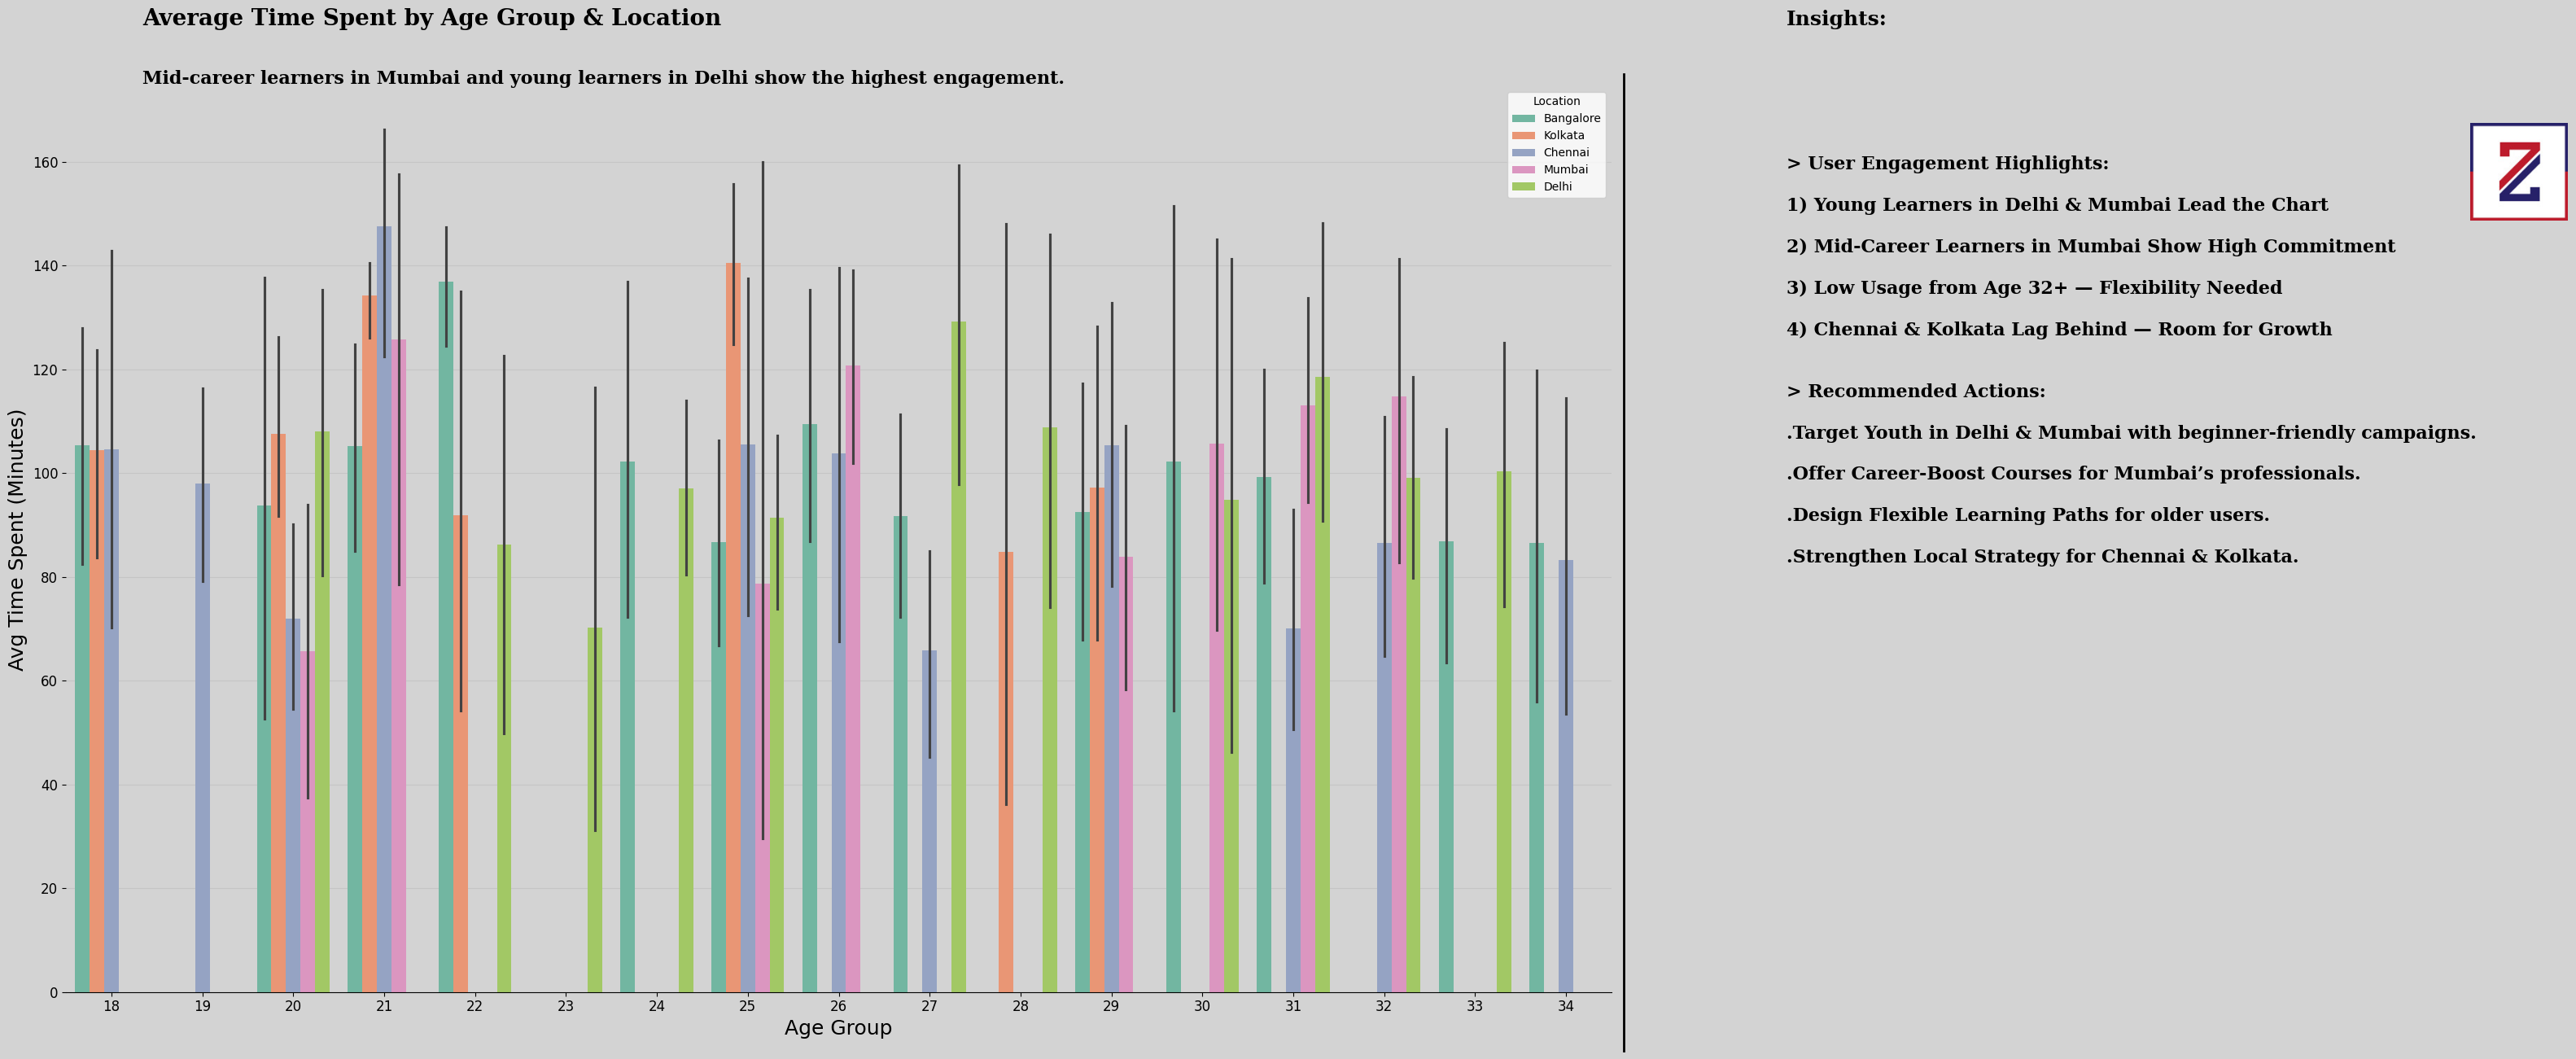

In [ ]:
# Chart - 3 visualization code
fig, ax = plt.subplots(1,1, figsize=(20,12))

sns.barplot(data=merged_df, x='Age', y='Time_Spent_Minutes', hue='Location', ax=ax, palette='Set2')
ax.set_xlabel('Age Group', fontsize=18)
ax.set_ylabel('Avg Time Spent (Minutes)', fontsize=18)

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Average Time Spent by Age Group & Location',
    subtitle="Mid-career learners in Mumbai and young learners in Delhi show the highest engagement.",
    insight_text='''> User Engagement Highlights:

1) Young Learners in Delhi & Mumbai Lead the Chart

2) Mid-Career Learners in Mumbai Show High Commitment

3) Low Usage from Age 32+ — Flexibility Needed

4) Chennai & Kolkata Lag Behind — Room for Growth


> Recommended Actions:

.Target Youth in Delhi & Mumbai with beginner-friendly campaigns.

.Offer Career-Boost Courses for Mumbai’s professionals.

.Design Flexible Learning Paths for older users.

.Strengthen Local Strategy for Chennai & Kolkata.'''
)
plt.tight_layout()
plt.show()

#### Chart - 4
#### What is the average feedback rating per course?

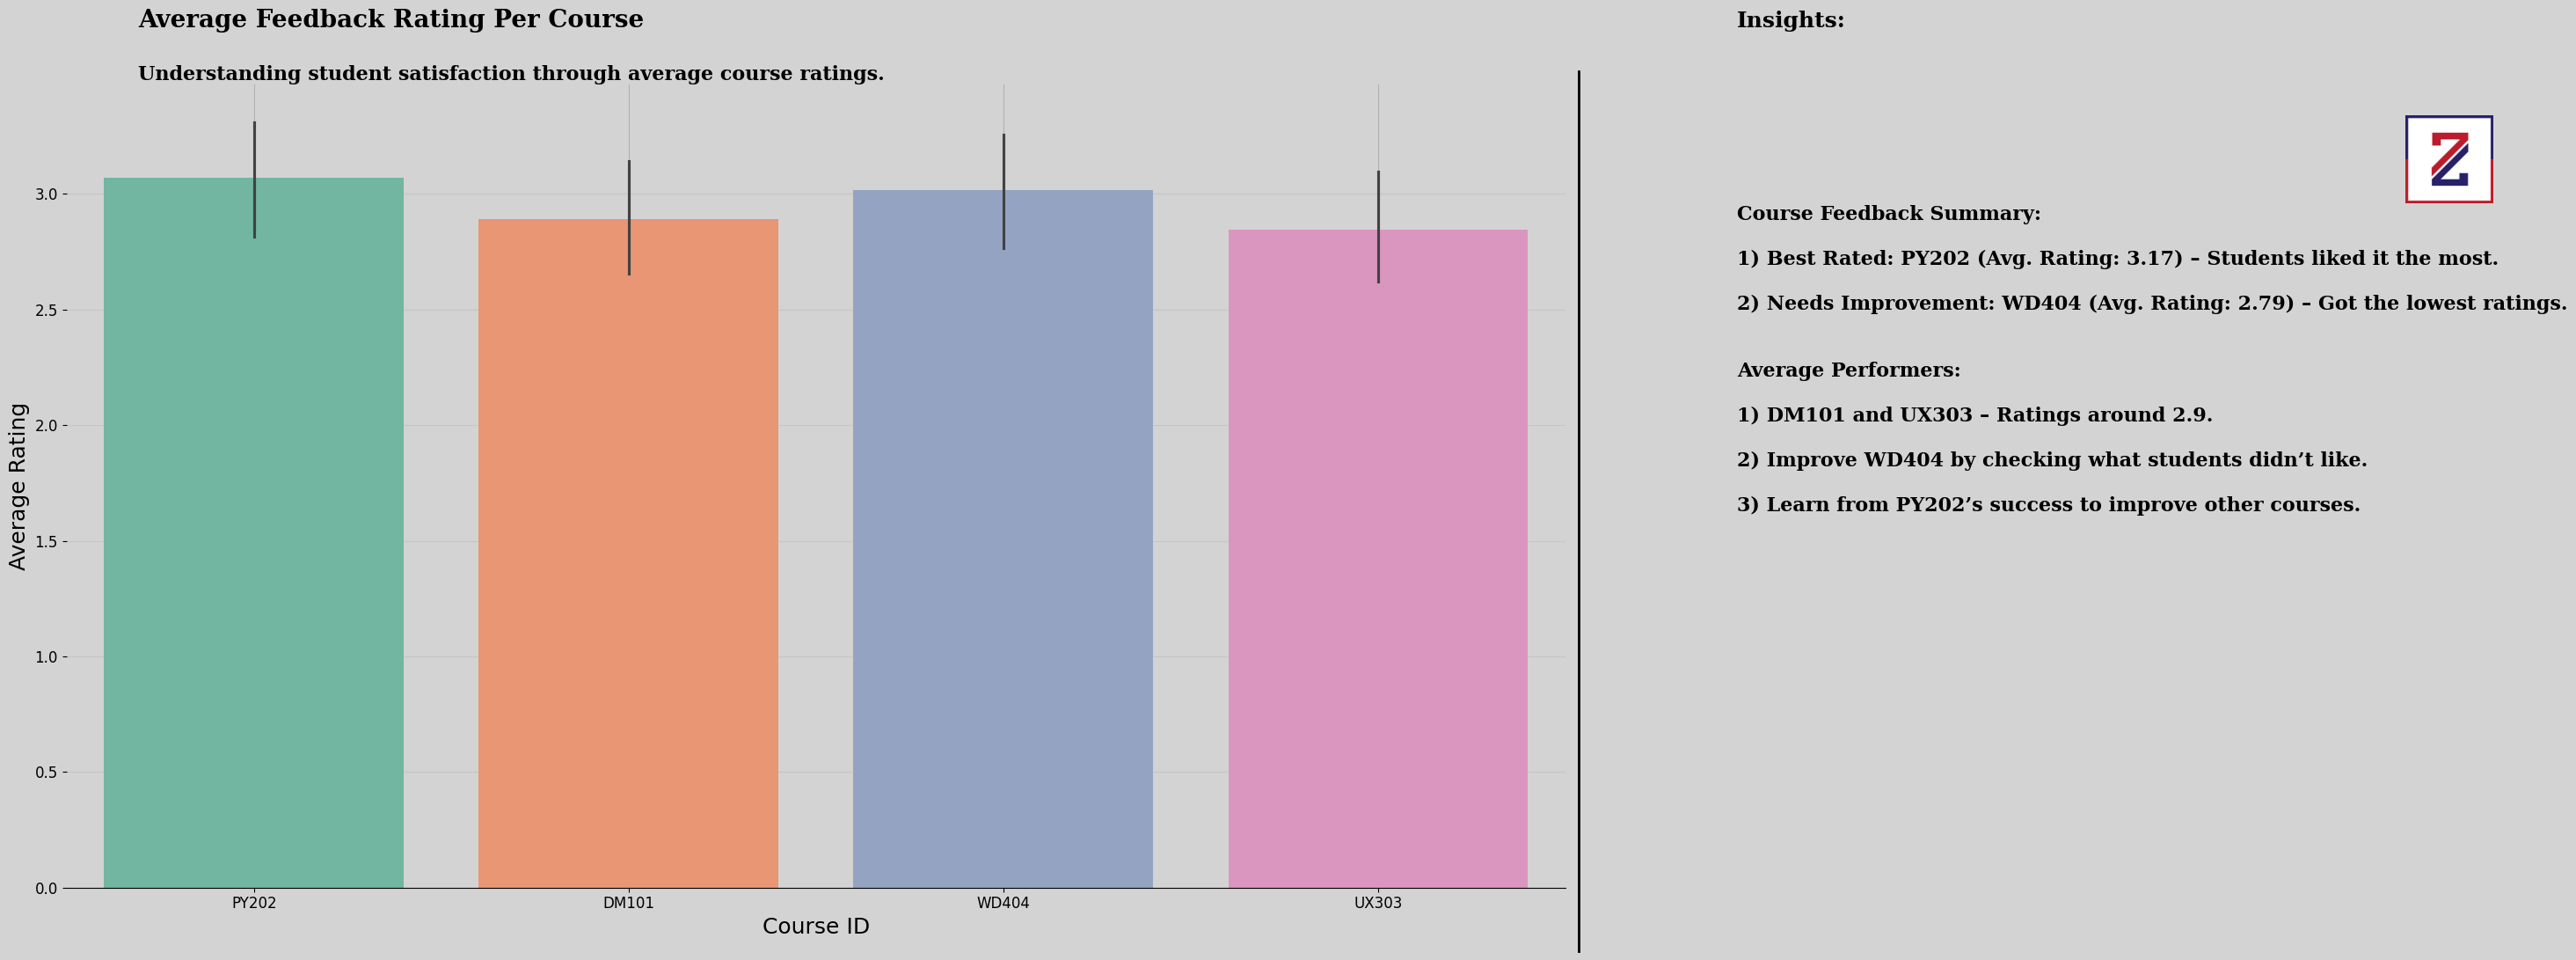

In [ ]:
# Chart - 4 visualization code
fig, ax = plt.subplots(1,1, figsize=(18,10))

sns.barplot(data=merged_df.sort_values(by='Rating', ascending=False),
x='Course_ID_x', y='Rating',palette='Set2')
ax.set_xlabel('Course ID', fontsize=18)
ax.set_ylabel('Average Rating',fontsize=18)
ax.grid()

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Average Feedback Rating Per Course',
    subtitle="Understanding student satisfaction through average course ratings.",
    insight_text='''Course Feedback Summary:

1) Best Rated: PY202 (Avg. Rating: 3.17) – Students liked it the most.

2) Needs Improvement: WD404 (Avg. Rating: 2.79) – Got the lowest ratings.


Average Performers:

1) DM101 and UX303 – Ratings around 2.9.

2) Improve WD404 by checking what students didn’t like.

3) Learn from PY202’s success to improve other courses.'''
)
plt.tight_layout()
plt.show()

#### Chart - 5
#### Is there a correlation between completion rate and feedback rating?

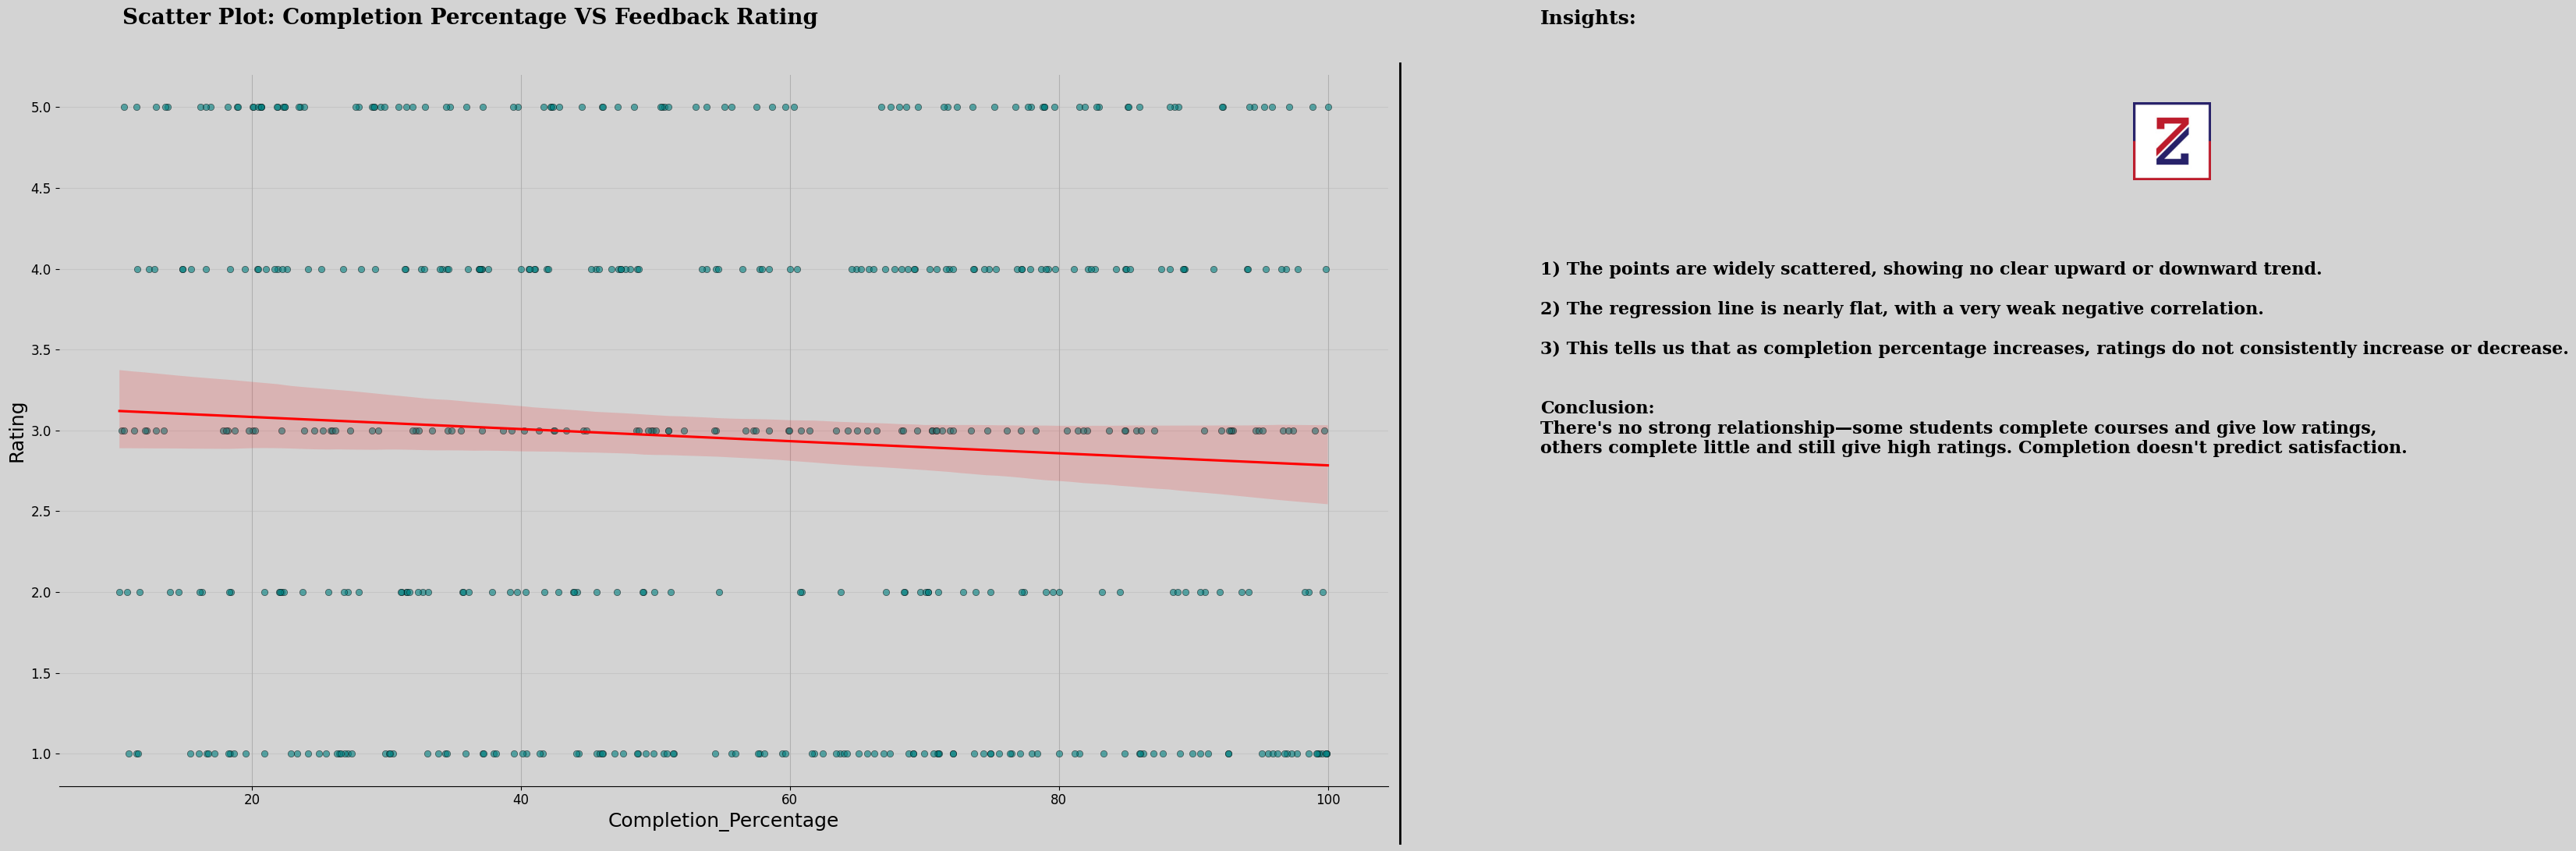

In [ ]:
# Chart - 5 visualization code
# Create a scatter plot with regression line
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Create scatter plot
sns.scatterplot(x='Completion_Percentage', y='Rating', data=merged_df,
                alpha=0.6, color='teal', edgecolor='black')
ax.set_xlabel('Completion Percentage', fontsize=18)
ax.set_ylabel('Rating', fontsize=18)
ax.grid()

# Add regression line
sns.regplot(x='Completion_Percentage', y='Rating', data=merged_df,
            scatter=False, color='red')

# Apply chart styling
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Scatter Plot: Completion Percentage VS Feedback Rating',
    subtitle=' ',
    insight_text='''1) The points are widely scattered, showing no clear upward or downward trend.

2) The regression line is nearly flat, with a very weak negative correlation.

3) This tells us that as completion percentage increases, ratings do not consistently increase or decrease.


Conclusion:
There's no strong relationship—some students complete courses and give low ratings,
others complete little and still give high ratings. Completion doesn't predict satisfaction.'''
)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Chart - 6
#### Identify top 3 student segments based on engagement and satisfaction.

In [ ]:
import pandas as pd

# Load the dataset

# Aggregate average engagement and satisfaction metrics per student
students = merged_df.groupby('Student_ID').agg({
    'Completion_Percentage': 'mean',
    'Rating': 'mean',
    'Time_Spent_Minutes': 'mean'
}).reset_index()

# Define rule-based segments (revised to 3 segments)
def label_segment(row):
    if row['Completion_Percentage'] >= 80 and row['Rating'] >= 4:
        return 'Highly Engaged & Satisfied'
    elif row['Completion_Percentage'] >= 50 and row['Rating'] < 4:
        return 'Engaged but Unsatisfied'
    else:
        return 'Low Engagement & Low Satisfaction'

# Apply segmentation
students['Segment'] = students.apply(label_segment, axis=1)

# Count students per segment
segment_counts = students['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Student_Count']
segment_counts


,Segment,Student_Count
0,Low Engagement & Low Satisfaction,46
1,Engaged but Unsatisfied,33
2,Highly Engaged & Satisfied,1


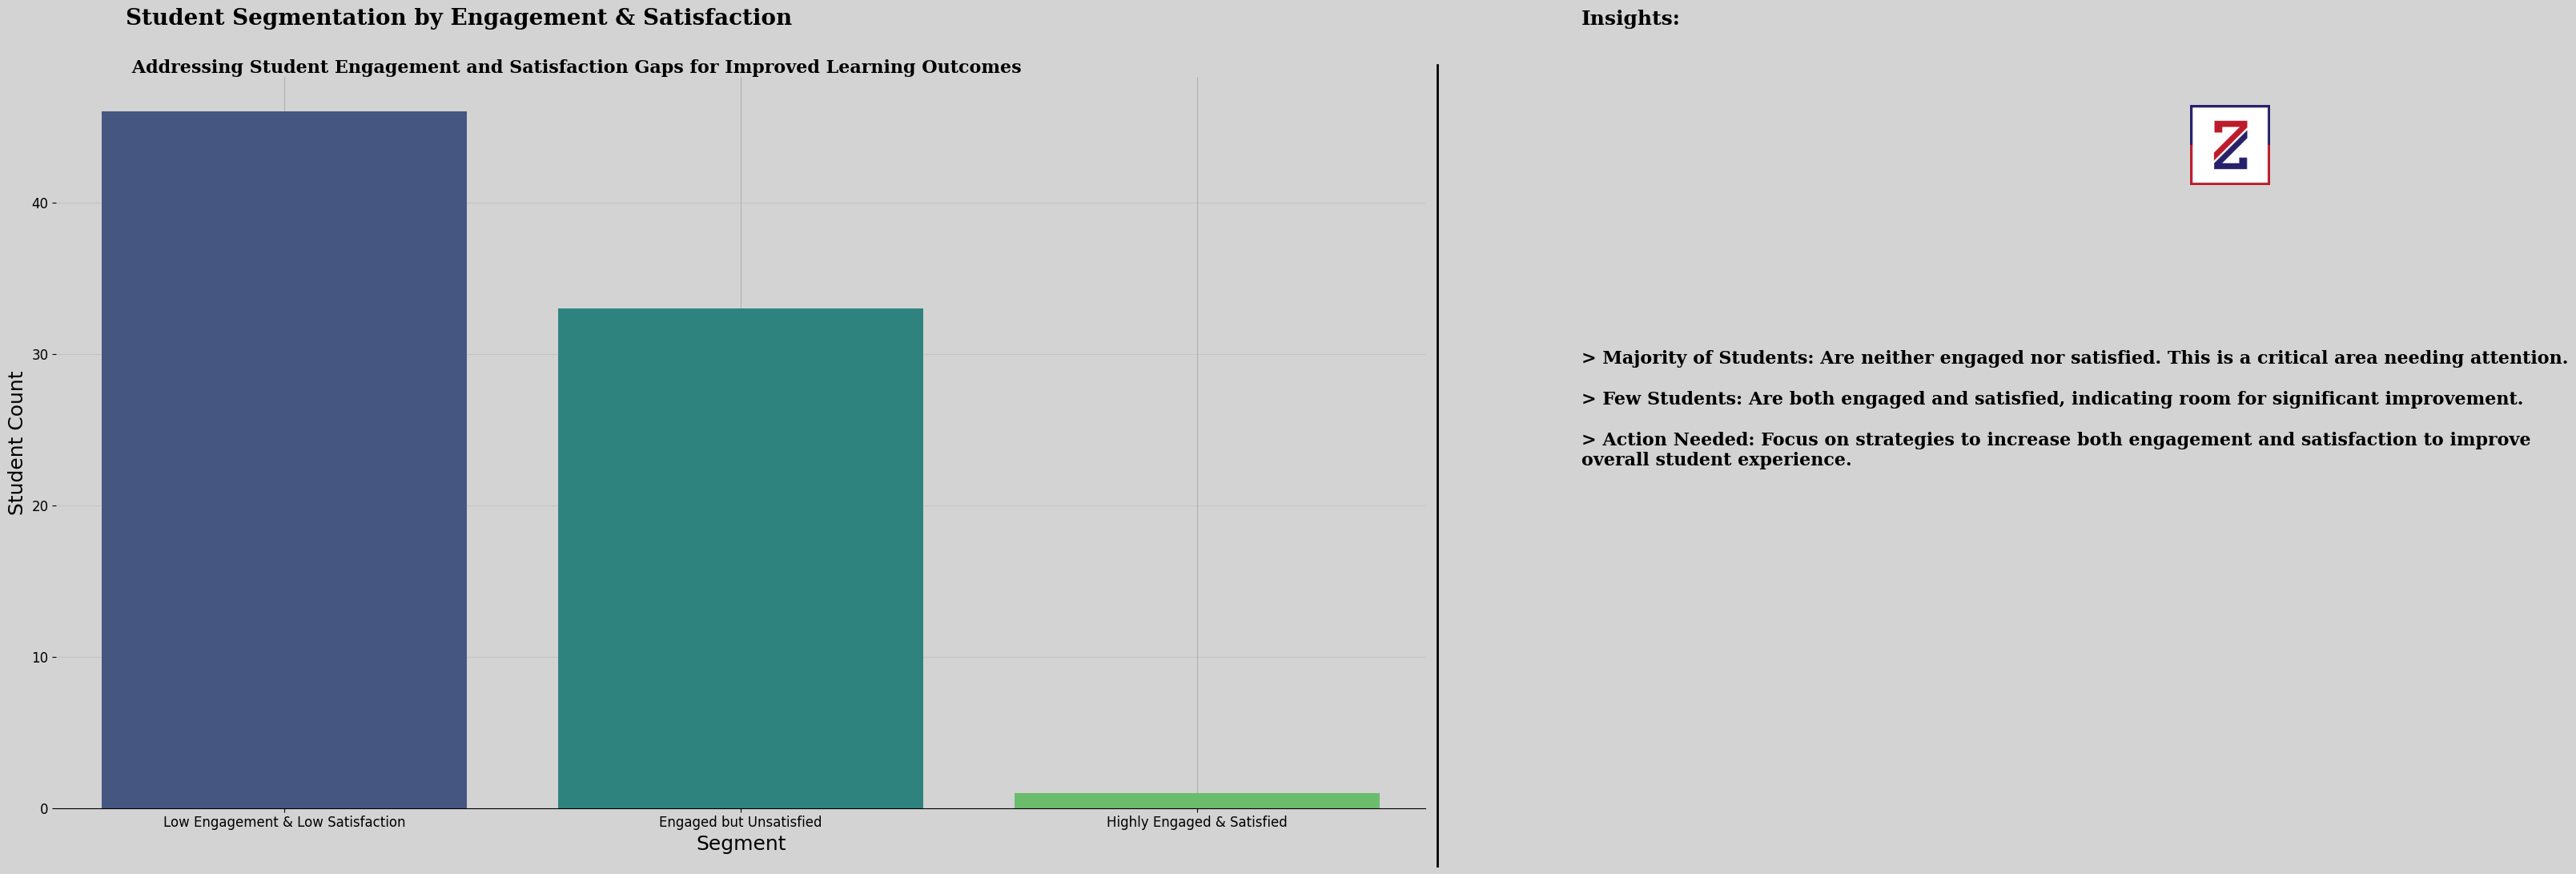

In [ ]:
# Visualizing Student Segmentation by Engagement and Satisfaction
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

# Create the bar plot
sns.barplot(x='Segment', y='Student_Count', data=segment_counts, hue='Segment', palette='viridis', ax=ax)
ax.set_xlabel('Segment', fontsize=18)
ax.set_ylabel('Student Count', fontsize=18)
ax.grid()

# Ensure apply_chart_styling is working with ax, not fig
apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Student Segmentation by Engagement & Satisfaction',
    subtitle=' Addressing Student Engagement and Satisfaction Gaps for Improved Learning Outcomes',
    insight_text='''
> Majority of Students: Are neither engaged nor satisfied. This is a critical area needing attention.

> Few Students: Are both engaged and satisfied, indicating room for significant improvement.

> Action Needed: Focus on strategies to increase both engagement and satisfaction to improve
overall student experience.'''
)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### Chart 7
#### Show engagement patterns by course and demographic

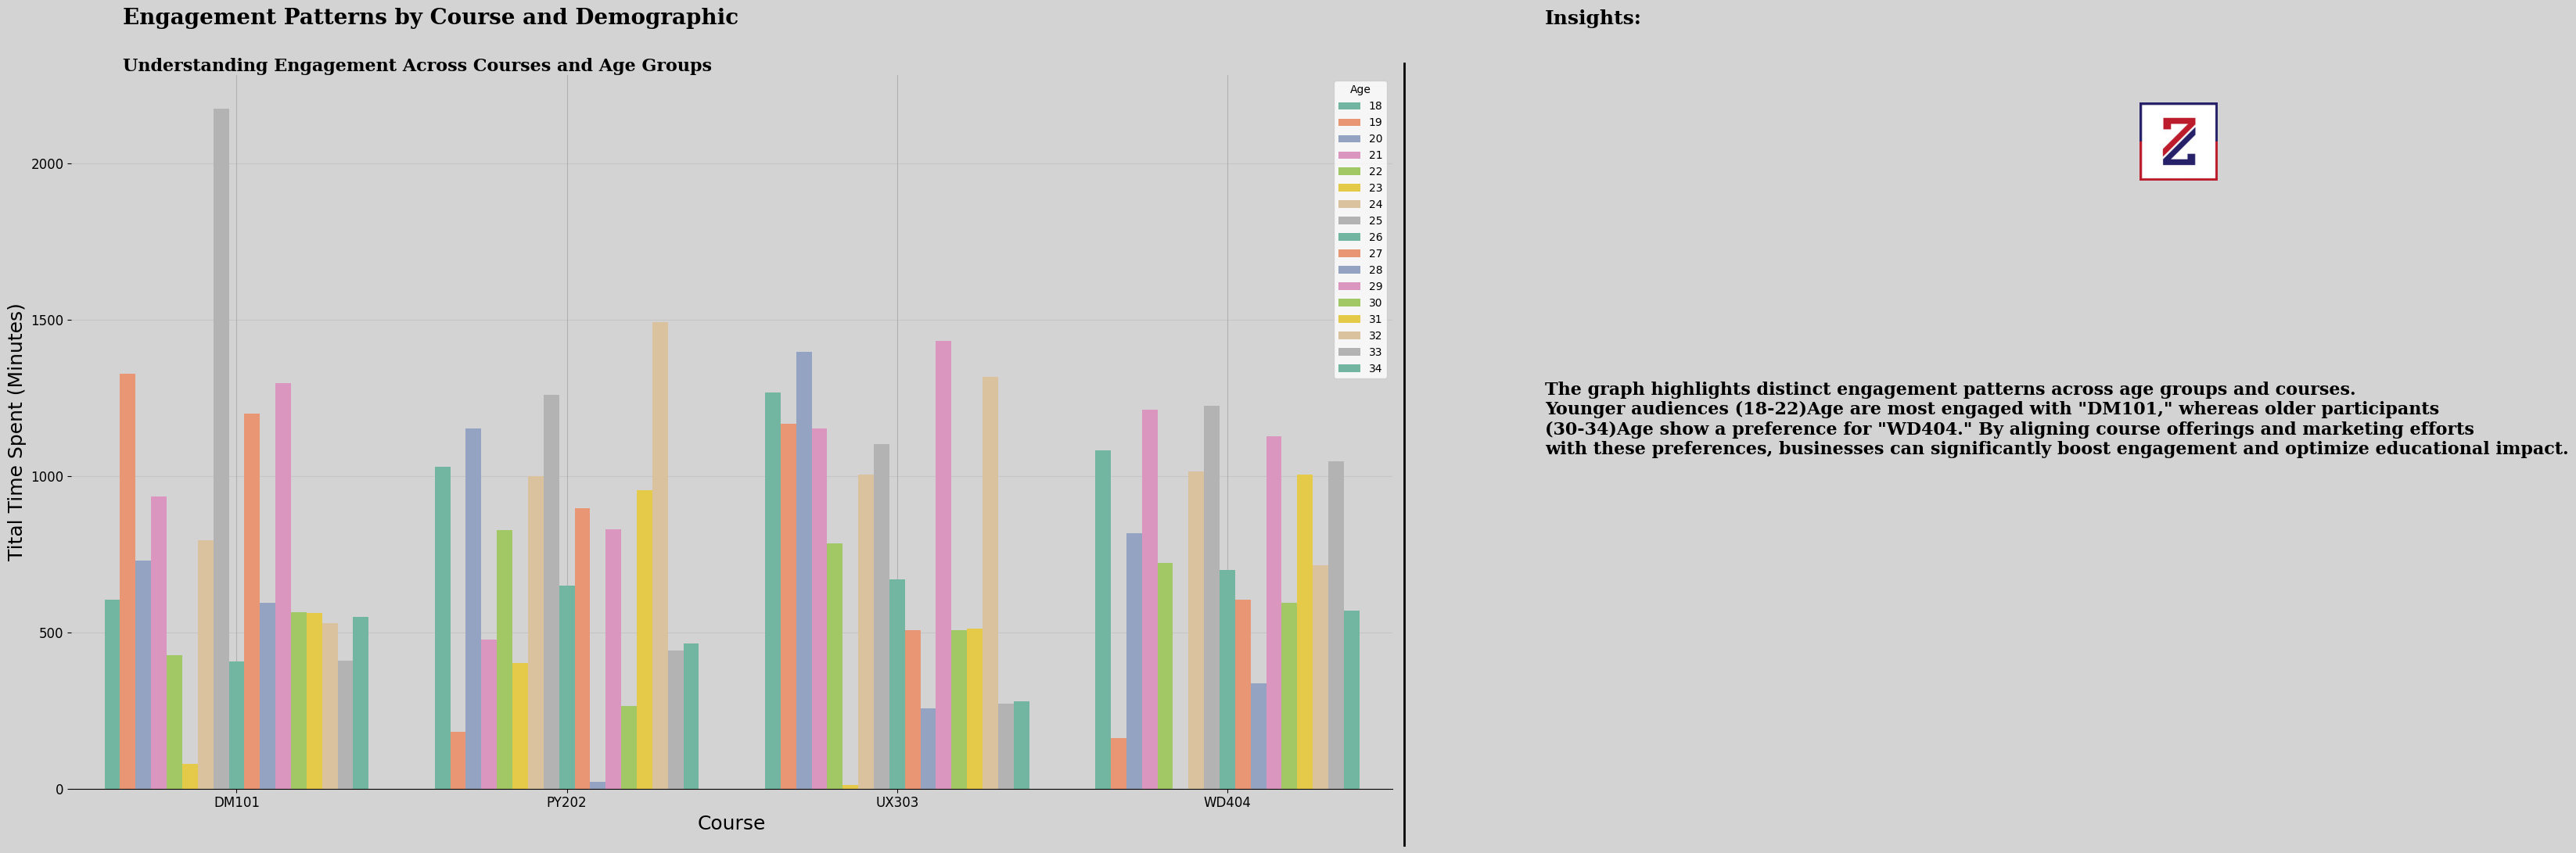

In [ ]:
# Aggregate the data by Course_ID_x and Age
course_age_data = merged_df.groupby(['Course_ID_x', 'Age'])['Time_Spent_Minutes'].sum().reset_index()

# Create a bar plot to compare engagement by course and demographic
fig, ax= plt.subplots(1,1, figsize=(18,10))
sns.barplot(x='Course_ID_x', y='Time_Spent_Minutes', hue='Age', data=course_age_data, palette='Set2', ax=ax)
ax.set_xlabel('Course', fontsize=18)
ax.set_ylabel('Tital Time Spent (Minutes)', fontsize=18)
ax.grid()

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Engagement Patterns by Course and Demographic',
    subtitle='Understanding Engagement Across Courses and Age Groups',
    insight_text='''
The graph highlights distinct engagement patterns across age groups and courses.
Younger audiences (18-22)Age are most engaged with "DM101," whereas older participants
(30-34)Age show a preference for "WD404." By aligning course offerings and marketing efforts
with these preferences, businesses can significantly boost engagement and optimize educational impact.'''
)
plt.tight_layout()
plt.show()

#### Chart - 7
#### Compare feedback ratings

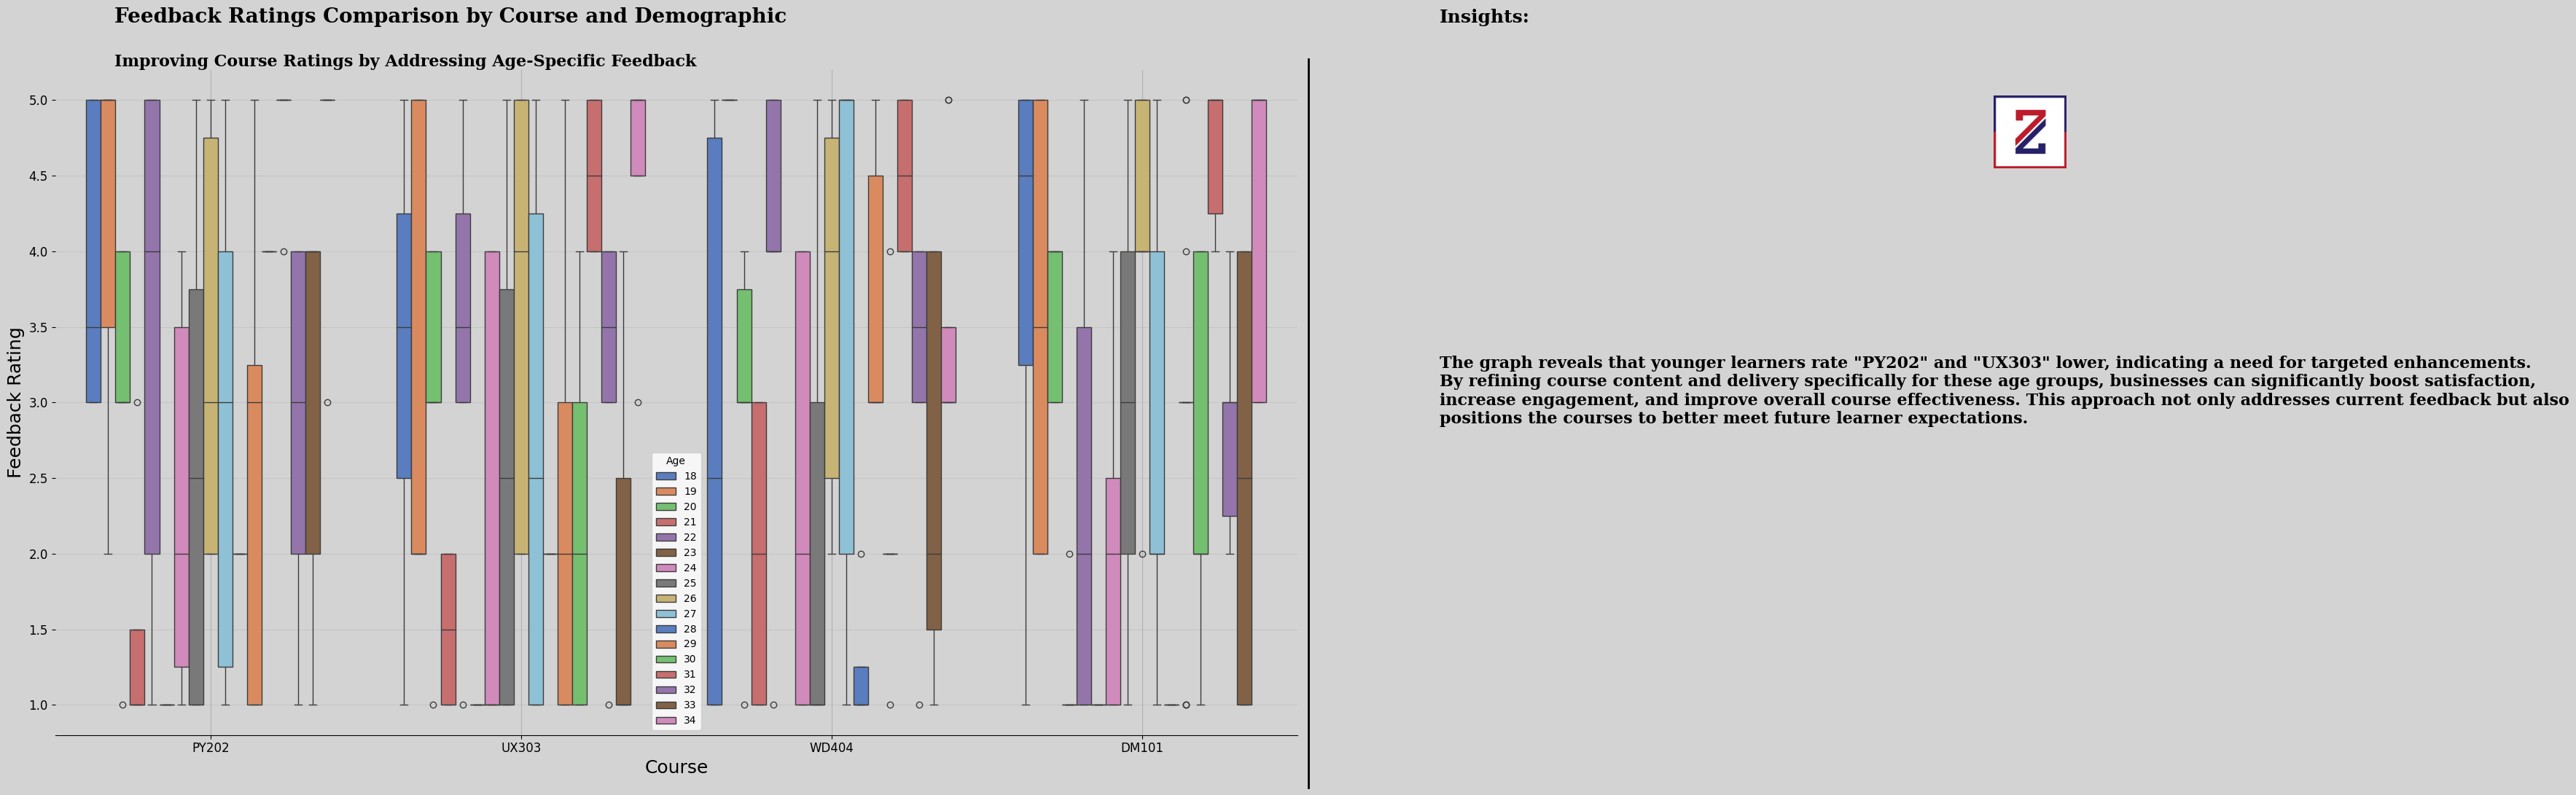

In [ ]:
# Chart - 7 visualization code
# Create a box plot to compare feedback ratings across courses and demographic groups
fig, ax = plt.subplots(1,1, figsize=(18, 10))
sns.boxplot(x='Course_ID_x', y='Rating', hue='Age', data=merged_df, palette='muted',ax=ax)
ax.set_xlabel('Course', fontsize=18)
ax.set_ylabel('Feedback Rating', fontsize=18)
ax.grid()

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Feedback Ratings Comparison by Course and Demographic',
    subtitle='Improving Course Ratings by Addressing Age-Specific Feedback',
    insight_text='''
The graph reveals that younger learners rate "PY202" and "UX303" lower, indicating a need for targeted enhancements.
By refining course content and delivery specifically for these age groups, businesses can significantly boost satisfaction,
increase engagement, and improve overall course effectiveness. This approach not only addresses current feedback but also
positions the courses to better meet future learner expectations.  '''
)
plt.tight_layout()
plt.show()

#### Chart - 8
#### Highlight trends over time

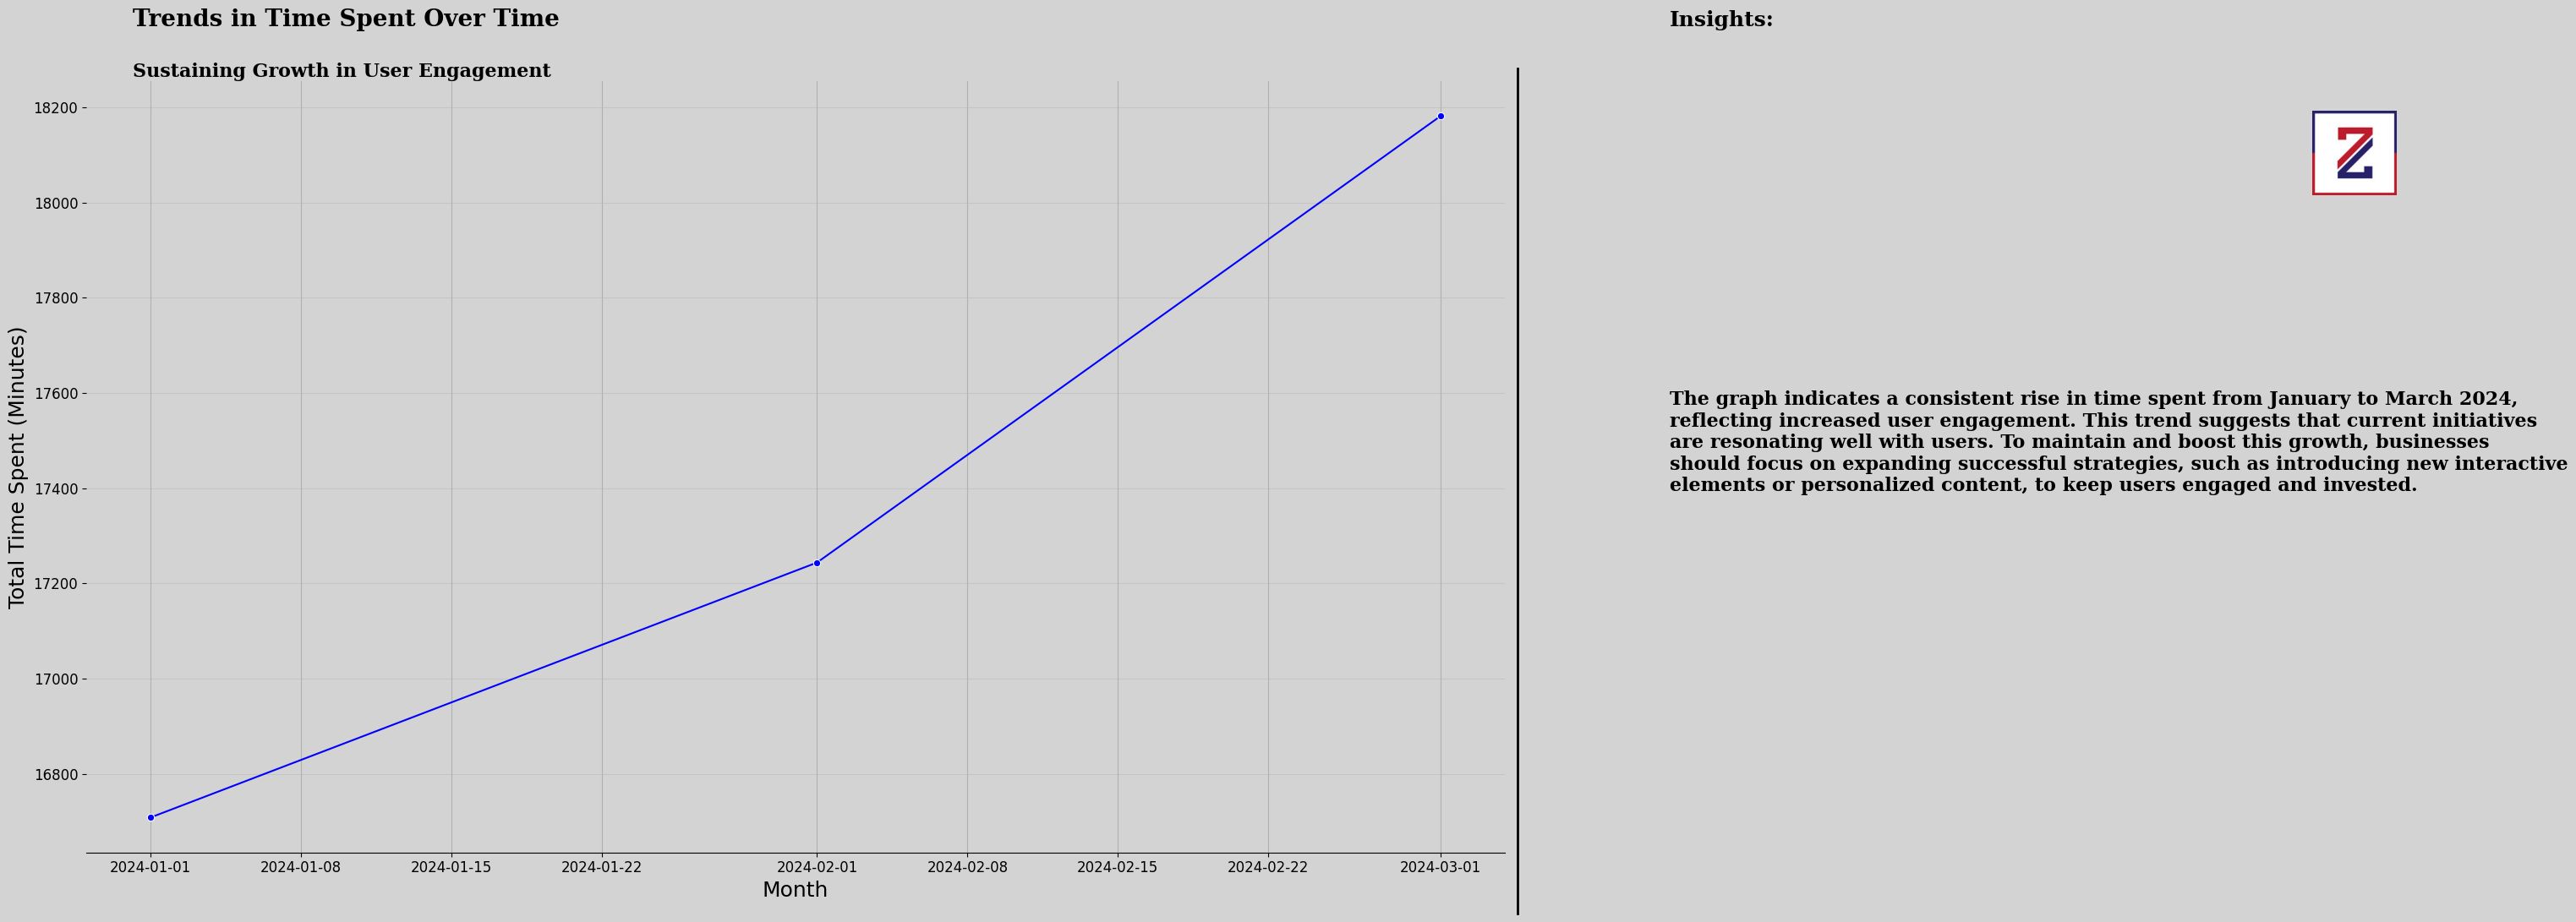

In [ ]:
# Convert the Date column to datetime (if it's not already)
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')  # Handle any errors during conversion

# Check for any invalid dates after conversion
if merged_df['Date'].isnull().sum() > 0:
    print(f"Warning: There are {merged_df['Date'].isnull().sum()} invalid or missing date entries.")

# Aggregate data by month+
monthly_engagement = merged_df.groupby(merged_df['Date'].dt.to_period('M'))['Time_Spent_Minutes'].sum().reset_index()

# Ensure 'Date' column is now in a Period format before plotting
monthly_engagement['Date'] = monthly_engagement['Date'].dt.to_timestamp()  # Convert Period to Timestamp for plotting

# Create a line plot to show trends over time
fig, ax = plt.subplots(1,1, figsize=(18, 10))
sns.lineplot(x='Date', y='Time_Spent_Minutes', data=monthly_engagement, marker='o', color='b')
ax.set_xlabel('Month', fontsize=18)
ax.set_ylabel('Total Time Spent (Minutes)',fontsize=18)
ax.grid()

apply_chart_styling(
    ax=ax,
    fig=fig,
    title='Trends in Time Spent Over Time',
    subtitle='Sustaining Growth in User Engagement',
    insight_text='''
The graph indicates a consistent rise in time spent from January to March 2024,
reflecting increased user engagement. This trend suggests that current initiatives
are resonating well with users. To maintain and boost this growth, businesses
should focus on expanding successful strategies, such as introducing new interactive
elements or personalized content, to keep users engaged and invested.'''
)

plt.tight_layout()
plt.show()

# **Strategic Recommendations for Zylentrix**


**1. Revamp Underperforming Courses**
* 📉 PY202 has the lowest engagement despite strong ratings.
* ➤ Action: Introduce modular content, interactive quizzes, and milestone rewards to sustain learner attention.
* ➤ Impact: Increases time-on-course and completion rates.

**2. Replicate What Works**
* 📈 DM101 leads in engagement.
* ➤ Action: Analyze its content structure, pacing, and instructor style. Apply these success elements to other courses.
* ➤ Impact: Standardizes a high-engagement learning model.

**3. Launch Demographic-Smart Campaigns**
* 🎯 Delhi & Mumbai learners (ages 18–25) are highly active.
* ➤ Action: Run geo-targeted campaigns, offer referral bonuses, and create  beginner-friendly landing pages for these cities.
* ➤ Impact: Increases enrollment and acquisition ROI.

**4. Segment and Personalize Learner Experience**
* Majority fall into Low Engagement & Low Satisfaction.
* ➤ Action: Implement segment-specific learning journeys:

**Nudges/reminders for disengaged users**
**Personalized feedback**

* Flexible learning timelines
* ➤ Impact: Boosts satisfaction and long-term retention.

**5. Improve Feedback Collection and Usage**
* Weak correlation between completion and satisfaction.
* ➤ Action: Add in-course rating prompts and analyze open-text feedback for pain points.
* ➤ Impact: Surfaces actionable content fixes before drop-off happens.

**6. Double Down on What’s Working**
* Engagement is rising month-over-month.
* ➤ Action: Audit recent platform changes (e.g., UI updates, campaign launches) and invest more in these success levers.
* ➤ Impact: Sustains momentum and fuels compounding growth.

# **Conclusion**

**This analysis uncovers not just what’s happening on Zylentrix’s platform — but why it’s happening and how to fix it.**

**⚡ Key Takeaway:**
Most learners are not fully engaged or satisfied — but with the right interventions, this gap becomes Zylentrix’s biggest growth opportunity.

**What Zylentrix should do next:**

* Transform underperforming courses by learning from top performers

* Use demographic insights to launch hyper-targeted campaigns

* Design dynamic, age-specific learning experiences

* Monitor engagement trends to stay ahead of the curve

**✅ From insights to impact — these strategies empower Zylentrix to elevate learner outcomes, drive retention, and build a platform that truly delivers value**